

#MENTORÍA 06
#**Cambio climático y ML: cómo mitigar las emisiones de CO2 mediante la reducción del consumo energético en construcciones edilicias**

**TP N°1: Análisis y visualización**

Fecha de entrega: **1 de julio**

##Consignas generales
Les propongo la elaboración de un informe que deberá apuntar a un público técnico, pero sin conocimientos específicos en el tema. Añadir gráficos y conclusiones obtenidas durante el desarrollo del práctico.


Algunas recomendaciones:
- Utilizar celdas de texto, que servirán para fundamentar sus decisiones, intercaladas con celdas de código, donde verterán el código implementado. No se recomienda utilizar comillas entre el código para explicar las tomas de decisión.
- En la primera celda de código deberían importar todas las librerías que van a utilizar en todo el trabajo práctico.
- Es super recomendable segmentar el trabajo en tópicos o tareas.




## Análisis descriptivo

Entender qué tipos de features poseen los dataset, qué significan y cómo se relacionan entre ellos.
- ¿Cuántos datos tiene mi data set?
- ¿Cuántas features tengo? ¿De qué tipo son? 
- ¿A cuáles les deberé aplicar alguna transformación?  
- ¿Cuál es mi variable target? ¿Qué significa?
- ¿Todas las features aportan información diferente? 
- ¿Existen datos faltantes? ¿Qué me convendrá hacer con ellos?

## Análisis estadístico

Seleccionar algunos features que crean relevantes para el problema. Utilizar los gráficos y cálculos que le parezcan más apropiados para llegar a las conclusiones. 

- ¿Qué herramienta/s es/son la/s más adeduada/s para seleccionar features de interés? ¿Cuál es el criterio para realizar dicha selección?
- ¿Existen outliers para estos features?
- ¿Hay valores faltantes?
- ¿Hay valores que no corresponden?
- ¿Que decisión tomarían para completar o eliminar estos outliers y faltantes?
- ¿Cómo es la distribución de las variables en el dataset?
- ¿Existe correlación entre algunas de las variables?

# 1) IMPORTACION DE LIBRERIAS 

En la siguiente Notebook se utilizaran las siguientes librerias:
* [Pandas:](https://pandas.pydata.org/docs/) para la manipulación y análisis de datos estructurados, como tablas y hojas de cálculo.
* [NumPy:](https://numpy.org/doc/) para cálculos numéricos y operaciones con matrices y arreglos multidimensionales.
* [Seaborn:](https://seaborn.pydata.org/) para la creación de gráficos estadísticos atractivos y bien diseñados.
* [Matplotlib:](https://matplotlib.org/stable/index.html) para crear gráficos personalizables.
* [Missingno: ](https://github.com/ResidentMario/missingno) herramientas de visualización de datos faltantes.

In [4]:
# Instalacion
!pip install pandas numpy seaborn matplotlib missingno 

In [3]:
# Importacion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# 2) ANALISIS DESCRIPTIVO 

### 2.1) IMPORTACION DEL DATA SET

Importamos el data set a utilizar que se encuentra en el repositorio [Cambio-climatico-y-ML](https://github.com/TamaraMaggioni/Cambio-climatico-y-ML). En esta ocasion, se carga el archivo data.csv directamente en el entorno de vsc

In [4]:
df = pd.read_csv(r"C:\Users\pablo\OneDrive\Escritorio\PABLO\CURSOS\Diplodatos_Famaf\Climate_change_and_ML\data\data.csv")

### 2.2) DESCRIPCION GENERAL 

El data set es de la competicion de Kaggle "WiDS Datathon 2022", el conjunto de datos consta de las características del edificio (por ejemplo, superficie, tipo de instalación, etc.), los datos meteorológicos de la ubicación del edificio (por ejemplo, temperatura media anual, precipitaciones totales anuales, etc.), así como el consumo de energía del edificio y del año en cuestión, medido como intensidad del consumo energético del emplazamiento (Site Energy Usage Intensity, EUI). Cada fila de los datos corresponde a un único edificio observado en un año determinado. 

Mediante el metodo _**.shape**_ vemos el tamaño del data set

In [5]:
print(f"Filas: {df.shape[0]}\nColumnas: {df.shape[1]}")

Filas: 75757
Columnas: 64


Mediante el metodo _**.info()**_ de pandas podemos tener una visión rápida de la estructura de los datos.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [7]:
df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

De las 64 variables del data set, tenemos 3 tipos de datos distintos:
* 37 son del tipo **int**
* 24 son del tipo **float**
* 3 son del tipo **string**

A continuacion se menciona que representa cada variable:
1. **Year_Factor**: año anonimizado en el que se observaron los factores de clima y uso de energía.
2. **State_Factor**: estado anonimizado en el que se encuentra el edificio.
3. **building_class**: clasificación del edificio.
4. **facility_type**: tipo de uso del edificio.
5. **floor_area**: área del piso (en pies cuadrados) del edificio.
6. **year_built**: año en que se construyó el edificio.
7. **energy_star_rating**: calificación de energía del edificio.
8. **ELEVATION**: elevación de la ubicación del edificio (en m).
9. **january_min_temp**: temperatura mínima en enero (en grados Fahrenheit) en la ubicación del edificio.
10. **january_avg_temp**: temperatura promedio en enero (en grados Fahrenheit).
11. **january_max_temp**: temperatura máxima en enero (en Fahrenheit) en la ubicación del edificio.

...

... min, avg y max temp para el resto de meses del año.

...

46. **cooling_degree_days**: el día grado de refrigeración para un día dado es el número de grados en que la temperatura promedio diaria supera los 65 grados Fahrenheit (18,3°C). Cada mes se suma para producir un total anual en la ubicación del edificio.
47. **heating_degree_days**: día grado de calefacción para un día dado es el número de grados en que la temperatura promedio diaria cae por debajo de los 65 grados Fahrenheit (18,3°C). Cada mes se suma para producir un total anual en la ubicación del edificio.
48. **precipitation_inches**: precipitación anual en pulgadas en la ubicación del edificio.
49. **snowfall_inches**: caída de nieve anual en pulgadas en la ubicación del edificio.
50. **snowdepth_inches**: profundidad de nieve anual en pulgadas en la ubicación del edificio.
51. **avg_temp**: temperatura promedio durante un año en la ubicación del edificio.
52. **days_below_30F**: número total de días por debajo de 30 grados Fahrenheit en la ubicación del edificio.
53. **days_below_20F**: número total de días por debajo de 20 grados Fahrenheit en la ubicación del edificio.
54. **days_below_10F**: número total de días por debajo de 10 grados Fahrenheit en la ubicación del edificio.
55. **days_below_0F**: número total de días por debajo de 0 grados Fahrenheit en la ubicación del edificio.
56. **days_above_80F**: número total de días por encima de 80 grados Fahrenheit en la ubicación del edificio.
57. **days_above_90F**: número total de días por encima de 90 grados Fahrenheit en la ubicación del edificio.
58. **days_above_100F**: número total de días por encima de 100 grados Fahrenheit en la ubicación del edificio.
59. **days_above_110F**: número total de días por encima de 110 grados Fahrenheit en la ubicación del edificio.
60. **direction_max_wind_speed**: dirección del viento para la velocidad máxima del viento en la ubicación del edificio. Dado en direcciones de puntos cardinales de 360 grados (por ejemplo, 360 = norte, 180 = sur, etc.).
61. **direction_peak_wind_speed**: dirección del viento para la velocidad máxima de ráfaga de viento en la ubicación del edificio. Dado en direcciones de puntos cardinales de 360 grados (por ejemplo, 360 = norte, 180 = sur, etc.).
62. **max_wind_speed**: velocidad máxima del viento en la ubicación del edificio.
63. **days_with_fog**: número de días con niebla en la ubicación del edificio.
64. **id**: ID del edificio.

### 2.3) TRANSFORMACIONES NECESARIAS

#### 2.3.1) VARIABLES CATEGORICAS

Para poder utilizar el data set con lo diferentes modelos de predicion, sera necesario transformar las variables categoricas (_**State_Factor**_, _**building_class**_ y _**facility_type**_) a numericas. 

A continuacion podemos ver la cantidad de registors unicos que tiene cada una de ellas para tener una idea de la cantidad de columnas que se agregaran al data set.

In [8]:
columnasCategoricas = df.select_dtypes(exclude=np.number).columns
print(columnasCategoricas)
df[columnasCategoricas].nunique()

Index(['State_Factor', 'building_class', 'facility_type'], dtype='object')


State_Factor       7
building_class     2
facility_type     60
dtype: int64

La variable _**building_class**_ solo aportara 2 columnas nuevas al data set, mientras que _**State_Factor**_ y _**facility_type**_ aportaria 7 y 60, respectivamente.

Por lo tanto, sera necesario analizar en profundidad la distribucion de estas ultimas 2 variable para determianr si es posible reducir el tamaño del data set.
Se realiza un grafico para determinar con que frecuencia aparecen cada valor unico.

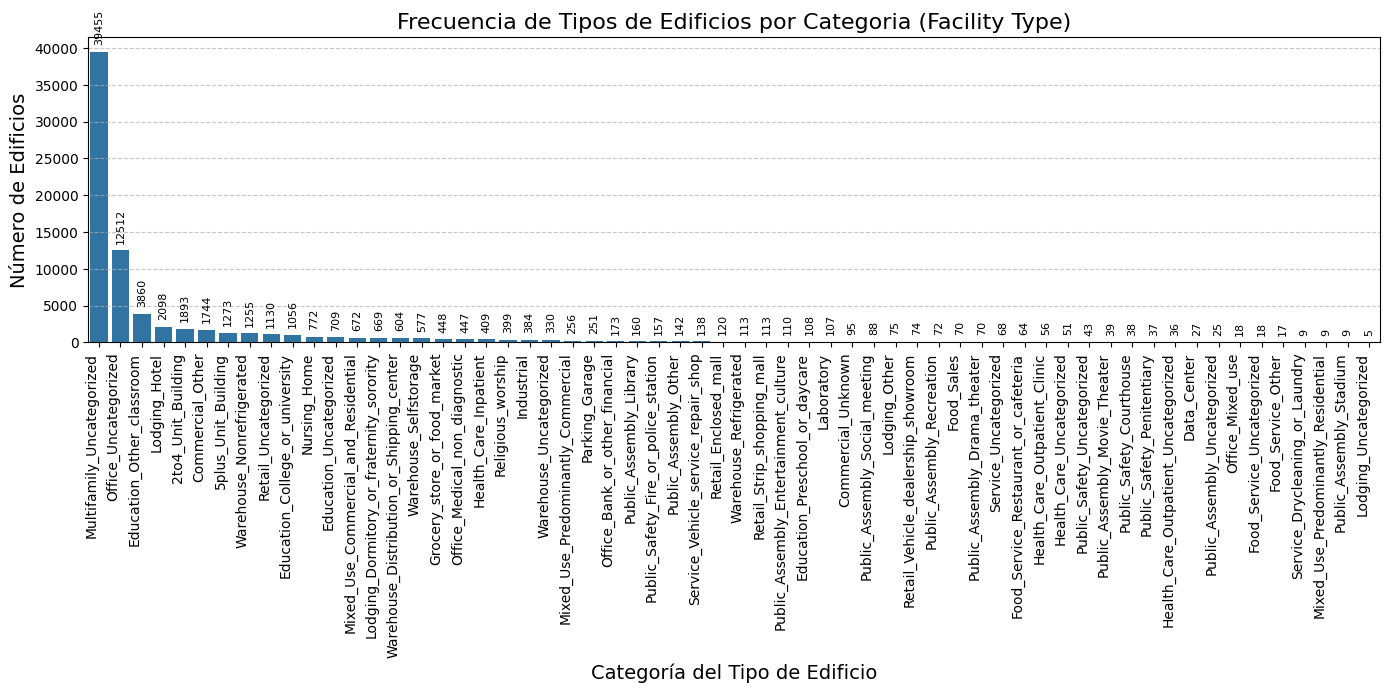

In [9]:
# Se crea el grafico
plt.figure(figsize=(14, 7))
ax = sns.countplot(data=df, x='facility_type', order=df['facility_type'].value_counts().index)

# Titulo y etiquetas
plt.title('Frecuencia de Tipos de Edificios por Categoria (Facility Type)', fontsize=16)
plt.xlabel('Categoría del Tipo de Edificio', fontsize=14)
plt.ylabel('Número de Edificios', fontsize=14)

# Rotacion del texto del eje x para mejor legibilidad
plt.xticks(rotation=90, ha='right', fontsize=10)

# Agregado de grilla para mejorar la visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de conteo encima de las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge', rotation=90, padding=5, fontsize=8) 

# Mejorar el espaciado
plt.tight_layout()

plt.show()

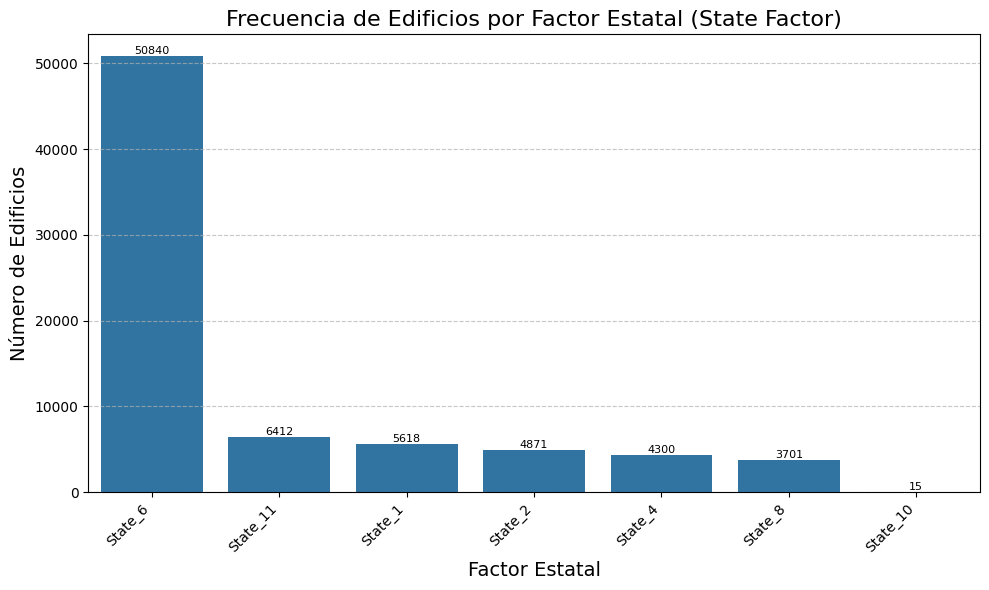

In [10]:
# Se crea el grafico
plt.figure(figsize=(10, 6)) 
ax = sns.countplot(data=df, x='State_Factor', order=df['State_Factor'].value_counts().index)

# Titulo y etiquetas
plt.title('Frecuencia de Edificios por Factor Estatal (State Factor)', fontsize=16)
plt.xlabel('Factor Estatal', fontsize=14)
plt.ylabel('Número de Edificios', fontsize=14)

# Rotacion del texto del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)

# Agregado de grilla para mejorar la visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de conteo encima de las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8) 

# Mejorar el espaciado
plt.tight_layout()

plt.show()

Tenemos 2 alternativas posibles:
* Eliminar los registros que no son muy frecuentes en el data set.
* Agrupar todos los registros que no son muy frecuentes en una nueva categorica.

#### 2.3.2) NOMBRE DE COLUMNAS

#### 2.3.3) UNIDADES DE MEDIDA

### 2.4) DESCRIPCION DEL PROBLEMA Y VARIABLE A PREDECIR

El objetivo consiste en predecir la EUI (Site Energy Usage Intensity) del emplazamiento para cada fila, dadas las características del edificio y los datos meteorológicos de la ubicación del edificio. 

...

La variable a predecir es
* _**site_eui**_: cantidad de calor y electricidad consumidos por un edificio (medido en kBtu/ft2)

Se realiza el grafico de la matriz de correlacion para la variable a predecir.

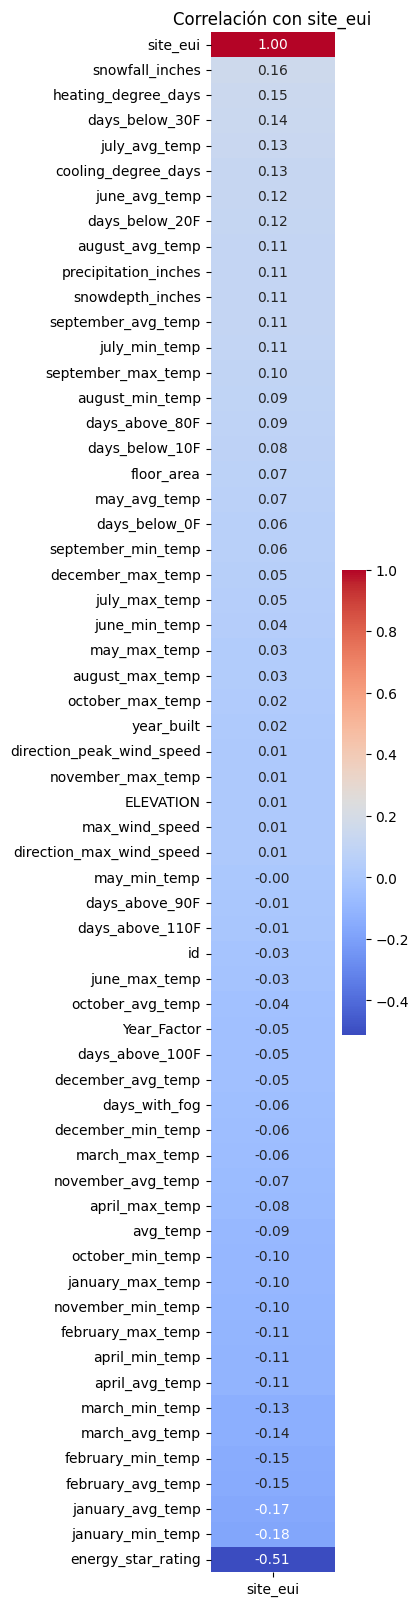

In [11]:
# Seleccionar solo las columnas numéricas para la matriz de correlación
df_numeric = df.select_dtypes(include=np.number)

# Generar la matriz de correlación
correlation_matrix = df_numeric.corr()

# Resaltar la columna 'site_eui' en la matriz de correlación usando un mapa de calor
plt.figure(figsize=(2, 20))
sns.heatmap(correlation_matrix[['site_eui']].sort_values(by='site_eui', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación con site_eui')
plt.show()

Se observa que no hay muchas variables con una correlacion muy elevada (> al 0,5). Solo encontramos la variable _**energy_star_rating**_.


### 2.5) DATOS FALTANTES

A coninuacion de analizan los datos faltantes del dataset

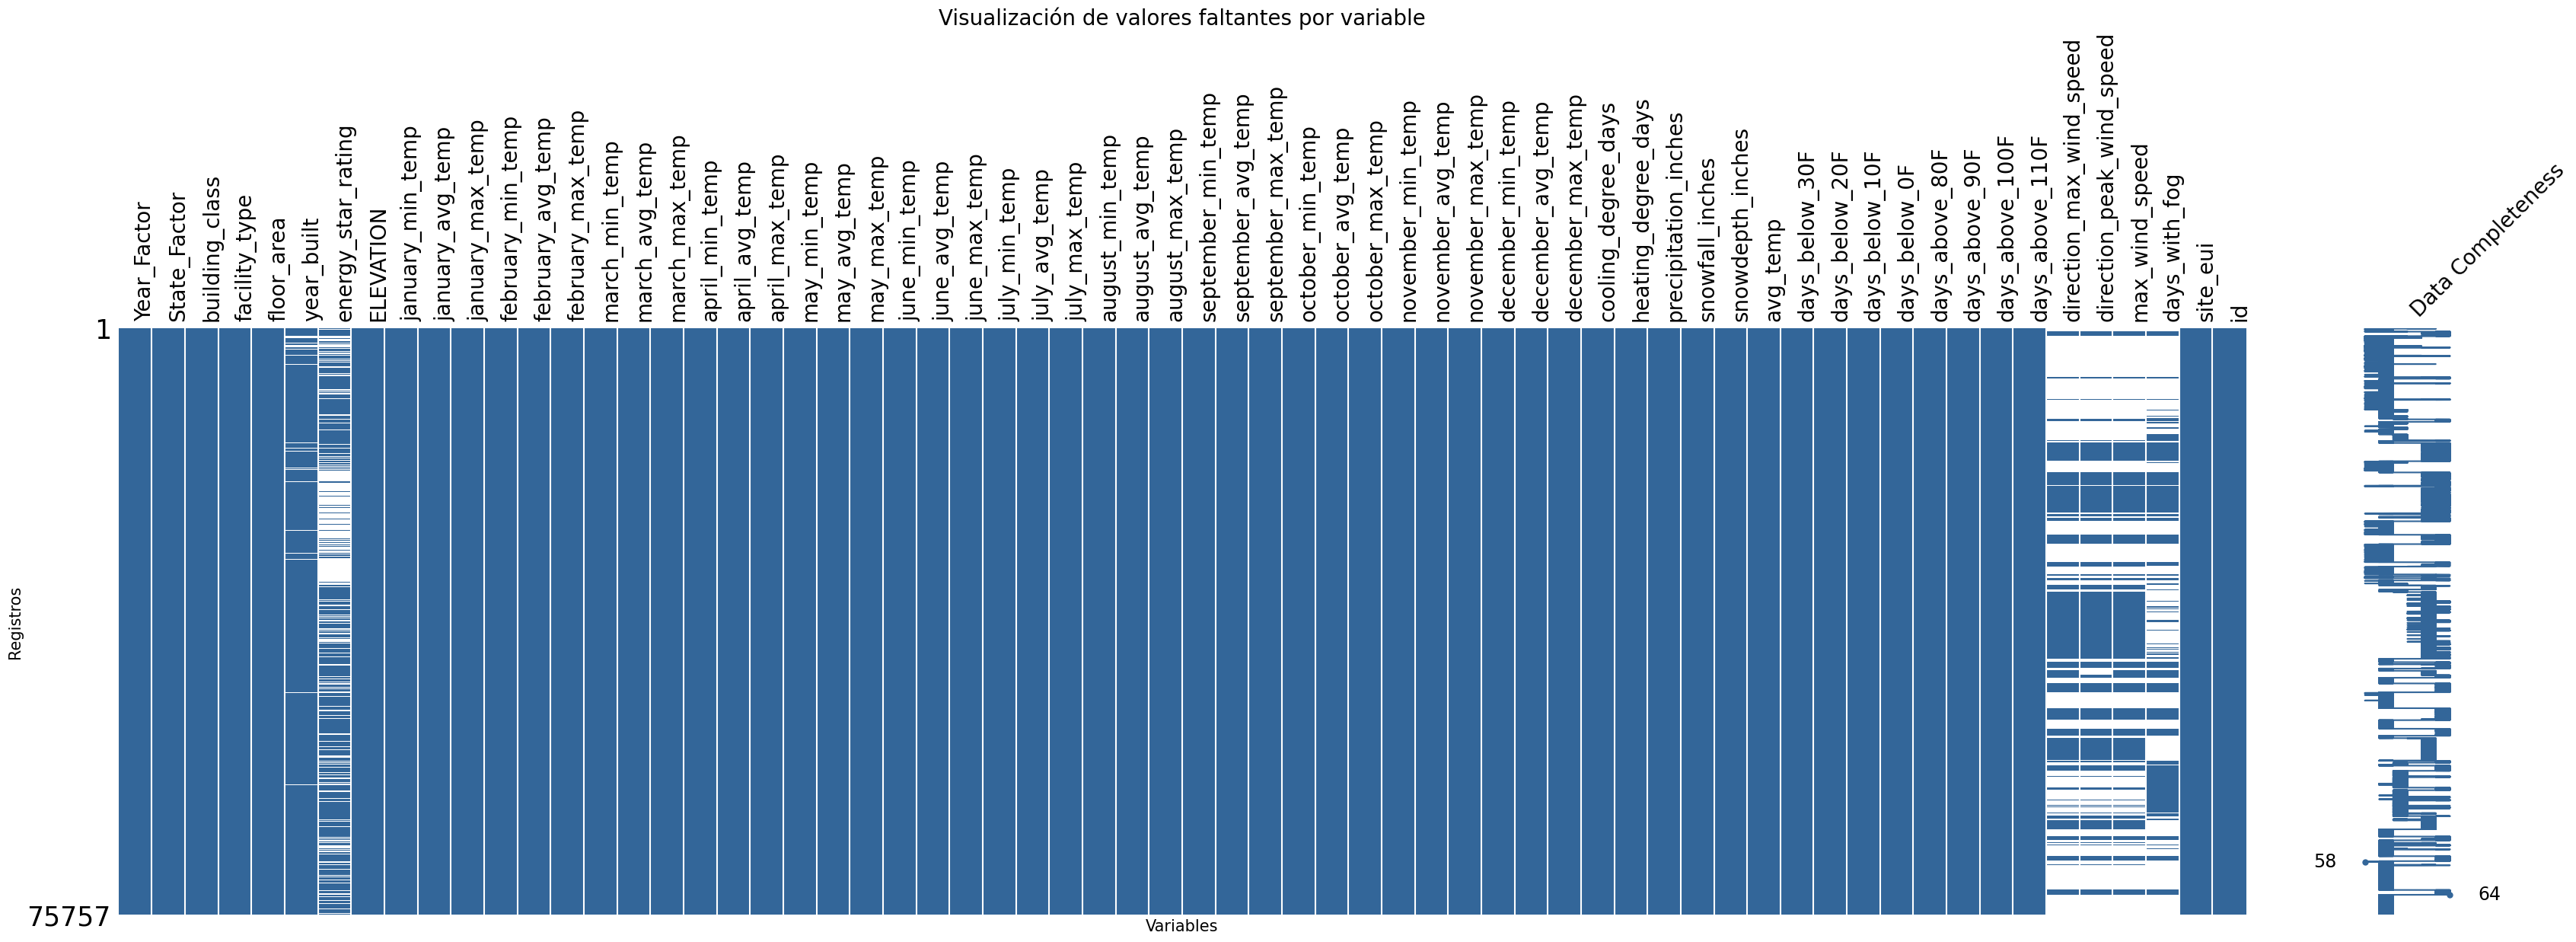

In [12]:
# Gráfico de missing values con nombres de variables rotados y referencias
msno.matrix(df, labels=True, figsize=(40, 10), fontsize=20, color=(0.2, 0.4, 0.6))
plt.xticks(rotation=90)
plt.title('Visualización de valores faltantes por variable', fontsize=20)
plt.xlabel('Variables', fontsize=15)
plt.ylabel('Registros', fontsize=15)
plt.show()

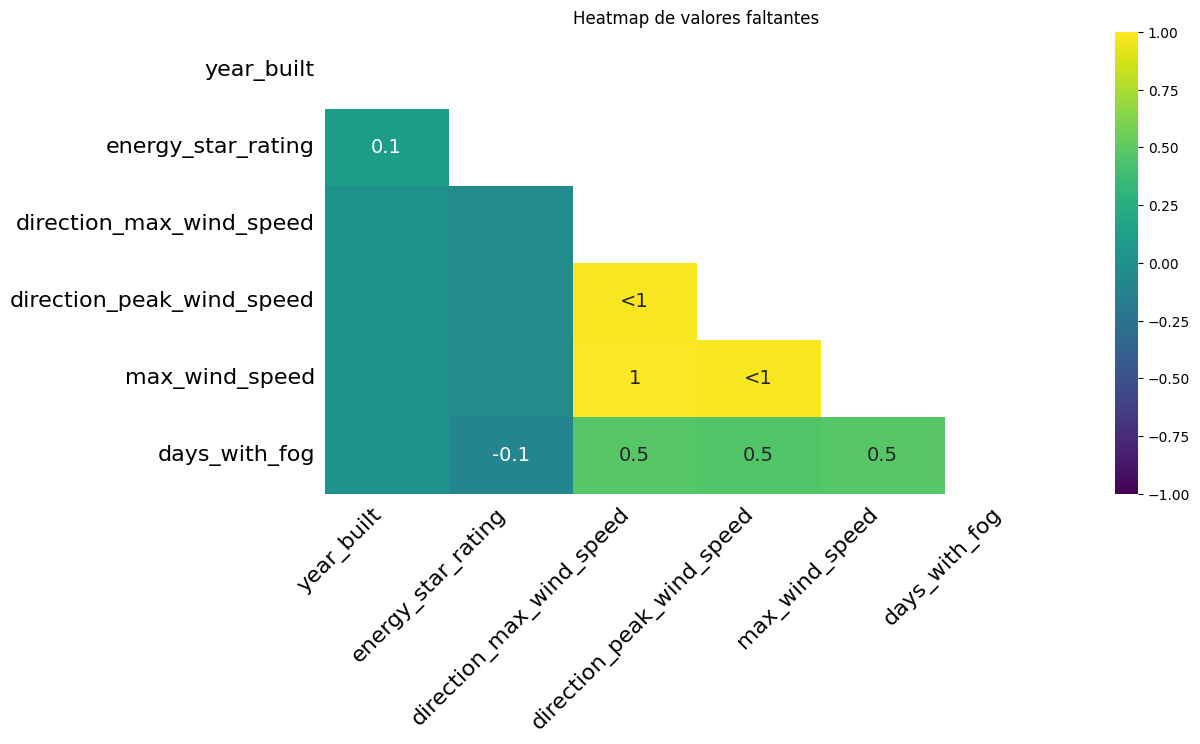

In [13]:
# Gráfico de heatmap de valores faltantes
msno.heatmap(df, figsize=(12, 6), cmap='viridis')
plt.title('Heatmap de valores faltantes')
plt.show()

Para entender este ultimo grafico hay que tener en cuenta que la correlación de nulidad oscila entre:
* -1: si una variable aparece la otra definitivamente no.
* 0: las variables que aparecen o no aparecen no tienen ningún efecto entre sí.
* 1: si una variable aparece la otra definitivamente también.

Se muestran las columnas con la cantidad de datos faltantes

In [ ]:
# Calcular la cantidad de datos faltantes por columna
missing_cols = df.columns[df.isnull().any()]
print('--Datos faltantes por columna--\n')
print(df[missing_cols].isnull().sum())
print('-------------------------------\n')

# Calcular el porcentaje de datos faltantes para las columnas en missing_cols
missing_percent = df[missing_cols].isnull().mean() * 100
print('--Porcentaje de datos faltantes por columna--\n')
print(missing_percent)
print('---------------------------------------------\n')

--Datos faltantes por columna--

year_built                    1837
energy_star_rating           26709
direction_max_wind_speed     41082
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
dtype: int64
-------------------------------

--Porcentaje de datos faltantes por columna--

year_built                    2.424858
energy_star_rating           35.256148
direction_max_wind_speed     54.228652
direction_peak_wind_speed    55.190939
max_wind_speed               54.228652
days_with_fog                60.451179
dtype: float64
---------------------------------------------



Se grafica la matriz de correlacion para entender si hay algun motivo para los datos faltantes asociados al viento

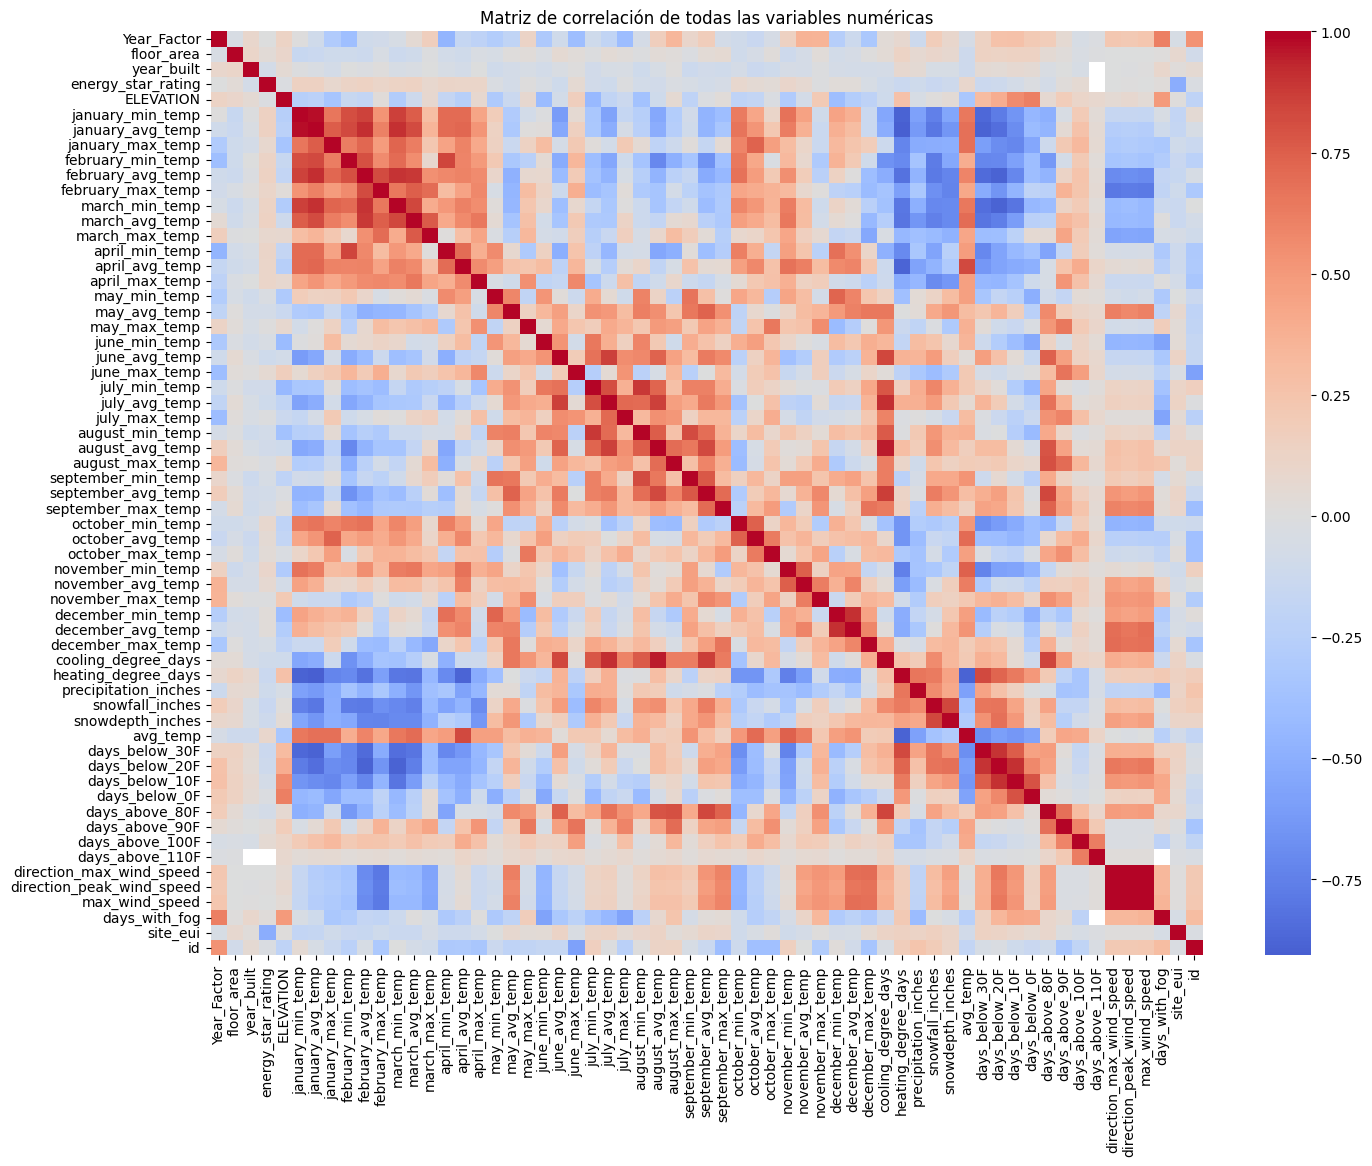

In [ ]:
# Generar la matriz de correlación para todas las variables numéricas de df
correlation_matrix_full = df.corr(numeric_only=True)

# Mostrar la matriz de correlación completa
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_full, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de todas las variables numéricas')
plt.show()

Si bien se observan que tienen una correlacion importante con algunas variables (_**may_avg_temp**_, _**december_avg_temp**_, entre otras), pero esto no explica el porque del dato faltante.

Se grafica el histograma de estas variables para seguir analizando

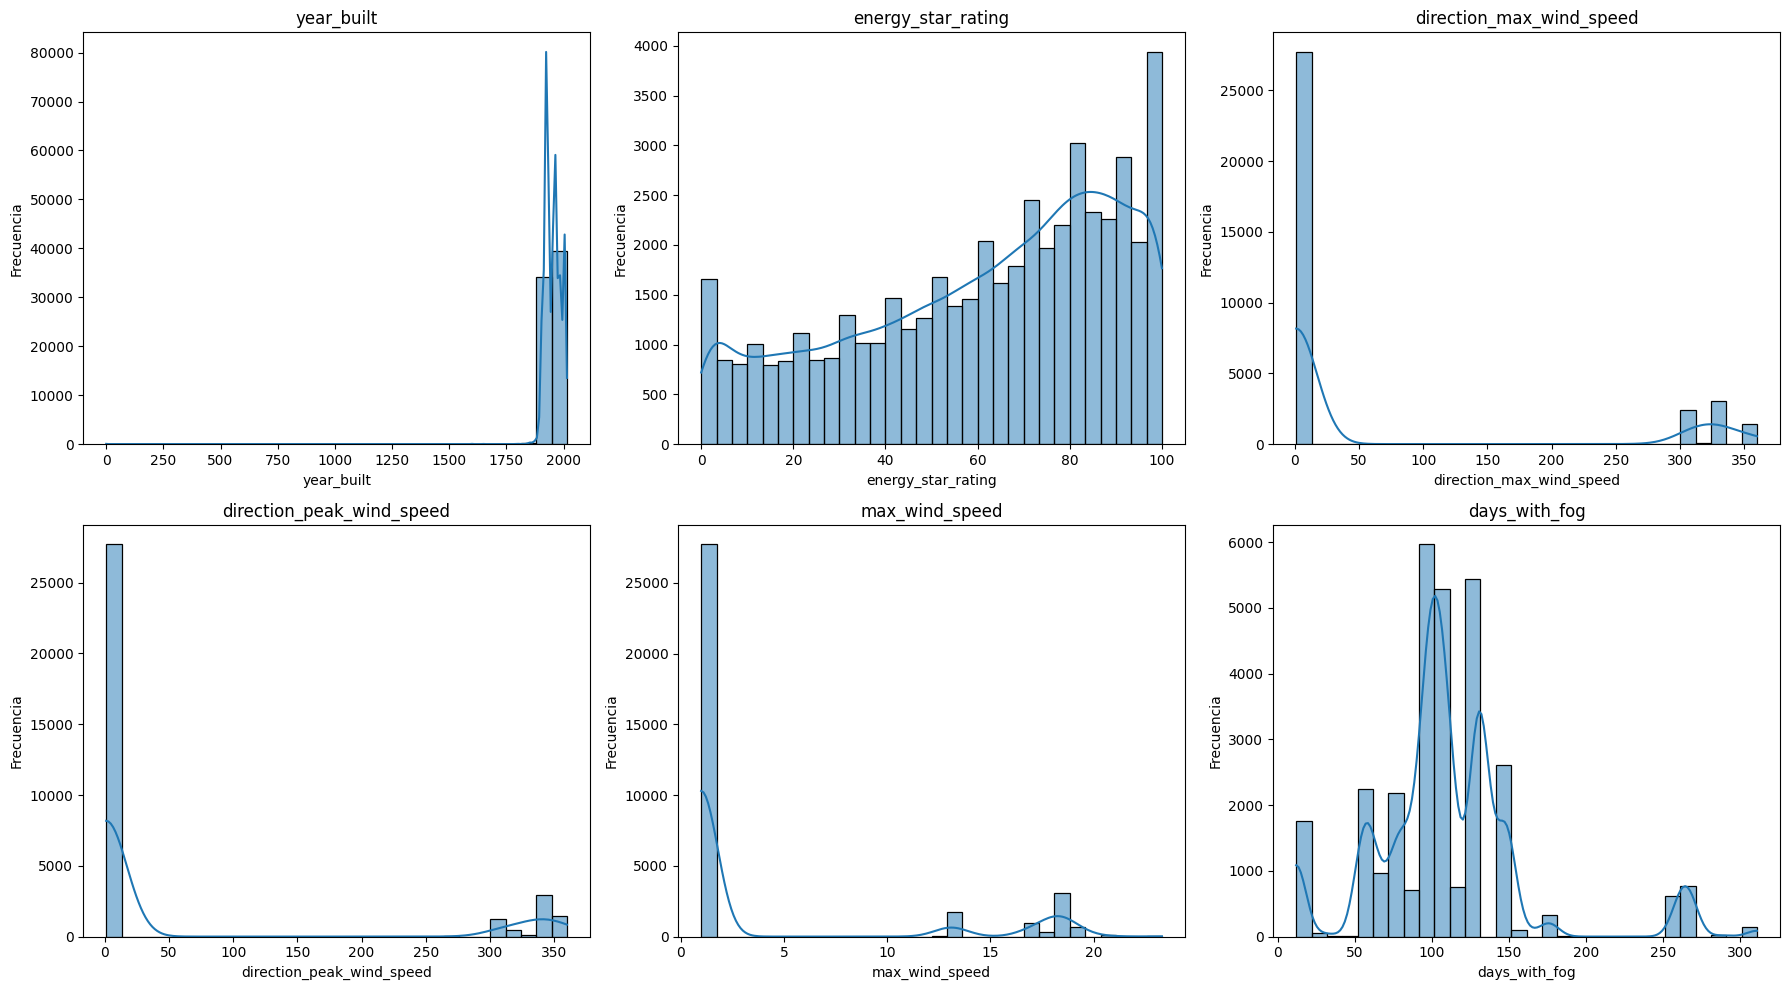

In [ ]:
variables = ['year_built', 'energy_star_rating', 'direction_max_wind_speed', 
             'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']

plt.figure(figsize=(18, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Observaciones:
* _**year_built**_: Se puede observar que tiene algunos datos extremos por debajo de la media. En este caso se podrian imputar los datos faltantes.
* _**energy_star_rating**_: Se observa que tiene una distribusion bastante uniforme o creciente hacia la derecha. En este caso los datos faltantes tambien se podrias imputar mediante una tecnica avanzada de imputacion multiple. 
* _**direction_max_wind_speed**_: Se puede observar que la mayoria de los datos estan proximos al cero, lo cual puede indicar la direccion o puede ser un dato mal registrado.
* _**direction_peak_wind_speed**_: idem anterior
* _**max_wind_speed**_: En este caso, que la mayoria de los datos este proximo al cero es cuestionable ya que estamos hablAndo de la velocidad maxima del viento.
* _**days_with_fog**_: Se observa una distribucion normal con algunos valores extremos a la derecha.

## CONCLUSIONES
* ¿Cuántos datos tiene mi data set?

* ¿Cuántas features tengo? ¿De qué tipo son?

* ¿A cuáles les deberé aplicar alguna transformación?

* ¿Cuál es mi variable target? ¿Qué significa?

* ¿Todas las features aportan información diferente?

* ¿Existen datos faltantes? ¿Qué me convendrá hacer con ellos?

# 3) ANALISIS ESTADISTICO

## CONCLUSIONES
* ¿Qué herramienta/s es/son la/s más adeduada/s para seleccionar features de interés? ¿Cuál es el criterio para realizar dicha selección?

* ¿Existen outliers para estos features?

* ¿Hay valores faltantes?

* ¿Hay valores que no corresponden?

* ¿Que decisión tomarían para completar o eliminar estos outliers y faltantes?

* ¿Cómo es la distribución de las variables en el dataset?

* ¿Existe correlación entre algunas de las variables?